<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/Regression_with_a_Mohs_Hardness_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/playground-series-s3e25/code?competitionId=60892&sortBy=voteCount

https://www.kaggle.com/code/larjeck/regression-with-a-mohs-hardness-dataset-optimal

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#!pip3 install tensorflow_decision_forests --upgrade
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import tensorflow_probability as tfp

In [22]:
train = pd.read_csv('/content/drive/MyDrive/Mohs_Hardness/train.csv')

In [23]:
train.head(3)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


<Axes: >

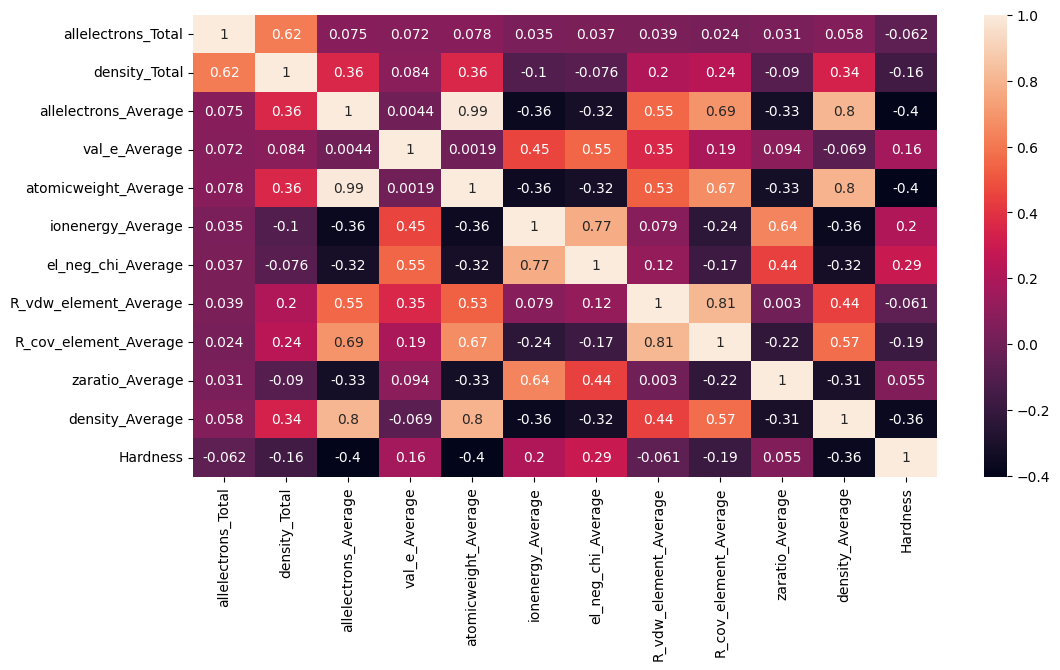

In [ ]:
plt.figure(figsize=(12,6))
corr_matrix=train.drop(columns=['id']).corr()
sns.heatmap(corr_matrix,annot=True)

<Axes: xlabel='allelectrons_Average', ylabel='density_Average'>

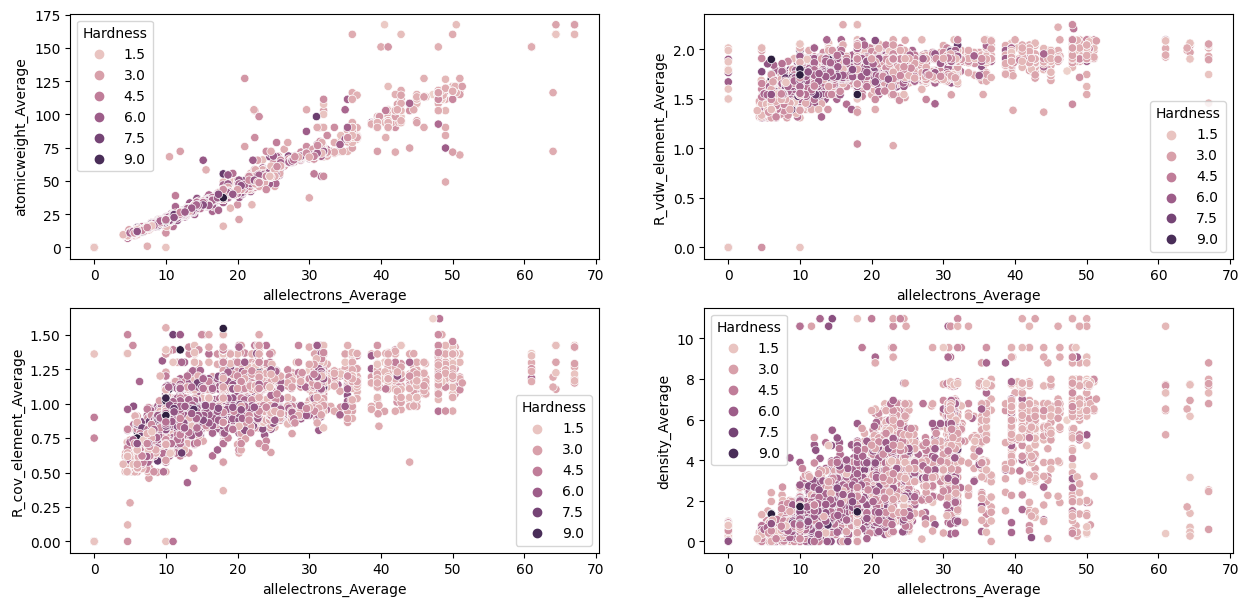

In [26]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
sns.scatterplot(data=train, x='allelectrons_Average', y='atomicweight_Average', hue='Hardness')
plt.subplot(222)
sns.scatterplot(data=train, x='allelectrons_Average', y='R_vdw_element_Average', hue='Hardness')
plt.subplot(223)
sns.scatterplot(data=train, x='allelectrons_Average', y='R_cov_element_Average', hue='Hardness')
plt.subplot(224)
sns.scatterplot(data=train, x='allelectrons_Average', y='density_Average', hue='Hardness')

In [27]:
features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
            'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
            'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
            'zaratio_Average', 'density_Average', 'Hardness']

In [28]:
X=train[features].drop(columns='Hardness')
y=train.Hardness

In [29]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.1)

In [30]:
model_pre = LGBMRegressor()
model_pre.fit(X,y)
X_new=X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126
